# Contoh Cartooning

## Import Requirement

In [ ]:
import cv2
from IPython.display import Image, display

## Kelas Cartooning
Mengurangi Detail Gambar dan meningkatkan garis tepi

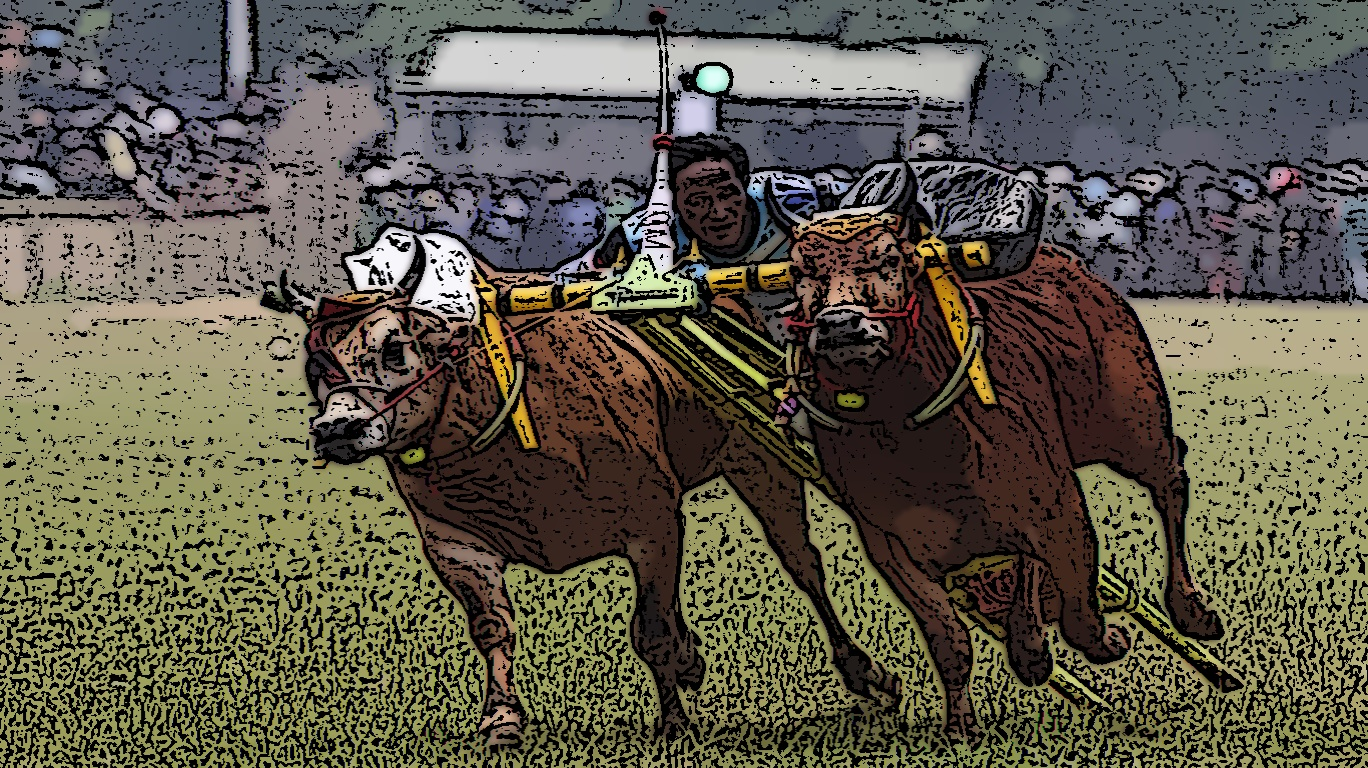

In [ ]:
class Cartoonizer:
  def __init__(self):
    pass

  def render(self, img_rgb):
    img_rgb = cv2.imread(img_rgb) # membaca gambar
    img_rgb = cv2.resize(img_rgb, (1366,768)) # mengubah ukuran menjadi 1366x768 pixel (mengurangi resolusi gambar)
    numDownSamples = 2 # jumlah penurunan resolusi gambar
    numBilateralFilters = 50 # jumlah proses filter bilateral (mengurangi detail gambar)

    # -- LANGKAH 1 --

    # Downsample image dengan piramida Gaussian
    img_color = img_rgb  # variabel untuk gambar yang telah disederhanakan

    # Proses DownSample
    for _ in range(numDownSamples):
      img_color = cv2.pyrDown(img_color) # mengurangi ukuran gambar ke setengahnya dalam setiap dimensi (lebar dan tinggi)

    # Proses Filter Bilateral
    for _ in range(numBilateralFilters):
      img_color = cv2.bilateralFilter(img_color, 9, 9, 7) # pengaburan yang mempertahankan tepi dalam gambar sambil mengurangi noise
      # gambar)
      # Diameter daerah di sekitar tiap piksel yang digunakan
      # Nilai yang mengontrol seberapa besar pengaruh piksel dari piksel dengan piksel yang sedang diproses
      # Nilai yang mengontrol seberapa besar pengaruh piksel yang memiliki perbedaan intensitas warna dengan piksel yang sedang diproses

    # UpSample ke ukuran asli
    for _ in range(numDownSamples):
      img_color = cv2.pyrUp(img_color) # memperbesar setiap piksel dan menambahkan piksel-piksel baru

    # -- LANGKAH 2 --
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) # konversi gambar berwarna menjadi gambar grayscale
    img_blur = cv2.medianBlur(img_gray, 3) # blur gambar grayscale (menggantikan nilai piksel kernel dengan nilai median dari daerah kernel tersebut)

    # -- LANGKAH 3 --
    img_edge = cv2.adaptiveThreshold(img_blur, 255,
        cv2.ADAPTIVE_THRESH_MEAN_C,
        cv2.THRESH_BINARY, 9, 2) # menentukan treshold (batas dari rata-rata intensitas di sekitar setiap piksel (dengan kernel 9x9) dikurangi dengan konstanta 2.)

    # -- LANGKAH 5 --
    (x,y,z) = img_color.shape # tinggi, lebar, dan jumlah saluran warna dalam gambar.
    img_edge = cv2.resize(img_edge,(y,x)) # resize ke ukuran asli gambar
    img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB) # Mengubah tepi menjadi berwarna
    cv2.imwrite("edge.png",img_edge) # Simpan proses treshold image ke file gambar

    return cv2.bitwise_and(img_color, img_edge) # operasi bitwise AND antara dua citra antar gambar asli dengan gambar treshold

tmp_canvas = Cartoonizer()

file_name = "/content/drive/MyDrive/DeepLearning/Cartooning/Tugas/karapan_sapi.jpg"
res = tmp_canvas.render(file_name)

cv2.imwrite("Cartoon version.jpg", res)

# Menampilkan gambar hasil
display(Image(filename='Cartoon version.jpg'))

cv2.waitKey(0)
cv2.destroyAllWindows()
